# Exploratory Data Analysis

#### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append(".")

from data_helper_functions import *

In [4]:
%load_ext autoreload
%autoreload 2

#### Extract data

In [ ]:
data_path = './'
books_df, users_df, ratings_df = load_data_original(data_path, save=True, filter=True)

#### Load data

In [5]:
data_path = './'
books_df, users_df, ratings_df = load_data(data_path)

In [8]:
print(f"Number of elements in books_df: {len(books_df)}")
print(f"Number of elements in users_df: {len(users_df)}")
print(f"Number of elements in ratings_df: {len(ratings_df)}")

Number of elements in books_df: 10000
Number of elements in users_df: 39686
Number of elements in ratings_df: 948844


#### EDA

In [6]:
books_df.head(5)

,authors,year,title,average_rating,num_ratings,num_1,num_2,num_3,num_4,num_5,genres,language,pages
book_id,,,,,,,,,,,,,
1,Suzanne Collins,2008.0,The Hunger Games,4.34,4780653,66715,127936,560092,1481305,2706317,"['fantasy', 'fiction', 'young-adult', 'classics']",eng,309.0
2,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,4.44,4602479,75504,101676,455024,1156318,3011543,"['young-adult', 'fantasy', 'romance', 'fiction...",eng,501.0
3,Stephenie Meyer,2005.0,Twilight,3.57,3866839,456191,436802,793319,875073,1355439,"['classics', 'fiction', 'historical-fiction', ...",eng,324.0
4,Harper Lee,1960.0,To Kill a Mockingbird,4.25,3198671,60427,117415,446835,1001952,1714267,"['classics', 'fiction', 'historical-fiction', ...",eng,200.0
5,F. Scott Fitzgerald,1925.0,The Great Gatsby,3.89,2683664,86236,197621,606158,936012,947718,"['young-adult', 'romance', 'fiction', 'contemp...",eng,313.0


In [ ]:
books_df.describe()

,year,average_rating,num_ratings,num_1,num_2,num_3,num_4,num_5,pages
count,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000
mean,1981.98590,4.002191,5.400124e+04,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04,359.401800
std,152.41642,0.254427,1.573700e+05,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04,216.171106
min,-1750.00000,2.470000,2.716000e+03,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02,0.000000
25%,1990.00000,3.850000,1.356875e+04,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03,251.000000
50%,2004.00000,4.020000,2.115550e+04,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03,337.000000
75%,2011.00000,4.180000,4.105350e+04,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04,422.000000
max,2017.00000,4.820000,4.780653e+06,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06,5216.000000


In [ ]:
users_df.head(5)

,num_ratings,average_rating,std,median_rating
user_id,,,,
314,181,3.585635,0.737574,4.0
439,177,3.259887,0.929459,3.0
588,186,3.618280,0.777723,4.0
1169,187,3.770053,0.765915,4.0
1185,190,3.473684,0.794719,3.0


In [ ]:
users_df.describe()

,num_ratings,average_rating,std,median_rating
count,39686.000000,39686.000000,39686.000000,39686.000000
mean,23.908784,3.868523,0.790963,3.949831
std,28.457381,0.560642,0.313009,0.701501
min,4.000000,1.000000,0.000000,1.000000
25%,7.000000,3.500000,0.585634,3.500000
50%,13.000000,3.857143,0.792961,4.000000
75%,29.000000,4.250000,0.967906,4.000000
max,200.000000,5.000000,2.309401,5.000000


In [ ]:
ratings_df.head(5)

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [ ]:
ratings_df.describe()

,Unnamed: 0,book_id,user_id,rating
count,948844.000000,948844.000000,948844.000000,948844.000000
mean,481115.936395,4843.977310,25538.097120,3.854982
std,281437.326744,2852.351915,15212.956028,0.983327
min,0.000000,1.000000,5.000000,1.000000
25%,237511.750000,2377.000000,12282.750000,3.000000
50%,476959.500000,4780.000000,24966.000000,4.000000
75%,722019.250000,7268.000000,38446.000000,5.000000
max,981755.000000,10000.000000,53424.000000,5.000000


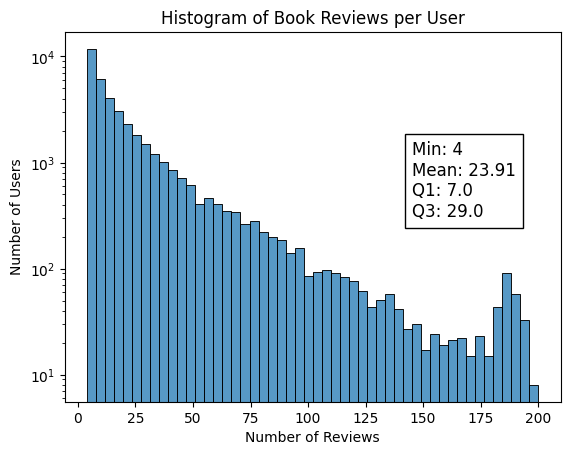

In [ ]:
# Count the number of reviews per user
reviews_per_user = ratings_df['user_id'].value_counts()

# Calculate mean, first quartile, and third quartile
min_reviews = reviews_per_user.min()
mean_reviews = reviews_per_user.mean()
q1_reviews = reviews_per_user.quantile(0.25)
q3_reviews = reviews_per_user.quantile(0.75)

sns.histplot(reviews_per_user, kde=False, bins=50)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.title('Histogram of Book Reviews per User')
plt.yscale('log')

# Create a text box with the calculated values
stats_text = f"Min: {min_reviews}\nMean: {mean_reviews:.2f}\nQ1: {q1_reviews}\nQ3: {q3_reviews}"
plt.text(0.7, 0.5, stats_text, transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', edgecolor='black', pad=5))

plt.show()

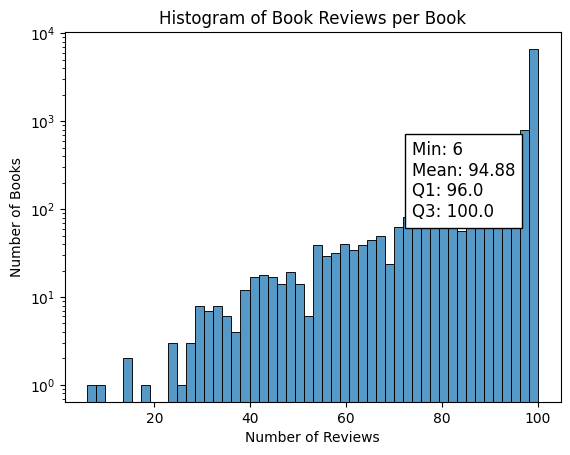

In [ ]:
# Count the number of reviews per book
reviews_per_book = ratings_df['book_id'].value_counts()

# Calculate min, mean, first quartile, and third quartile
min_reviews = reviews_per_book.min()
mean_reviews = reviews_per_book.mean()
q1_reviews = reviews_per_book.quantile(0.25)
q3_reviews = reviews_per_book.quantile(0.75)

sns.histplot(reviews_per_book, kde=False, bins=50)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Books')
plt.title('Histogram of Book Reviews per Book')
plt.yscale('log')

stats_text = f"Min: {min_reviews}\nMean: {mean_reviews:.2f}\nQ1: {q1_reviews}\nQ3: {q3_reviews}"
plt.text(0.7, 0.5, stats_text, transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', edgecolor='black', pad=5))

plt.show()

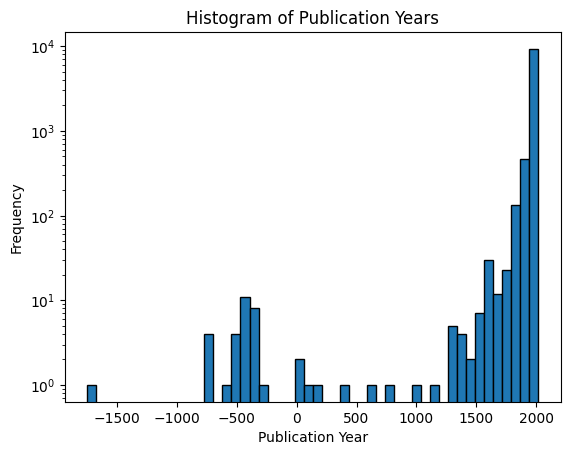

In [ ]:
books_df['year'].plot.hist(bins=50, edgecolor='black')
plt.xlabel('Publication Year')
plt.ylabel('Frequency')
plt.title('Histogram of Publication Years')
plt.yscale('log')
plt.show()

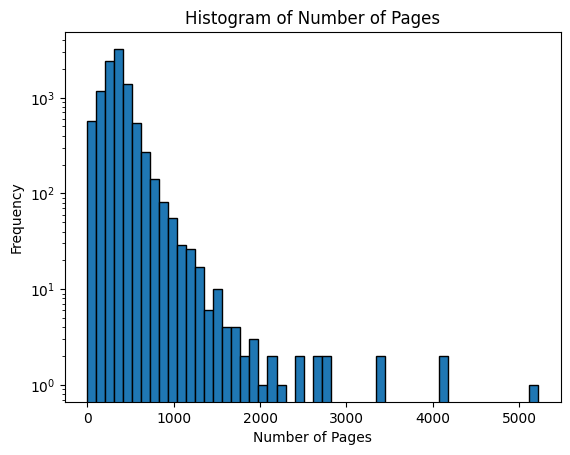

In [ ]:
books_df['pages'].plot.hist(bins=50, edgecolor='black')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Pages')
plt.yscale('log')
plt.show()

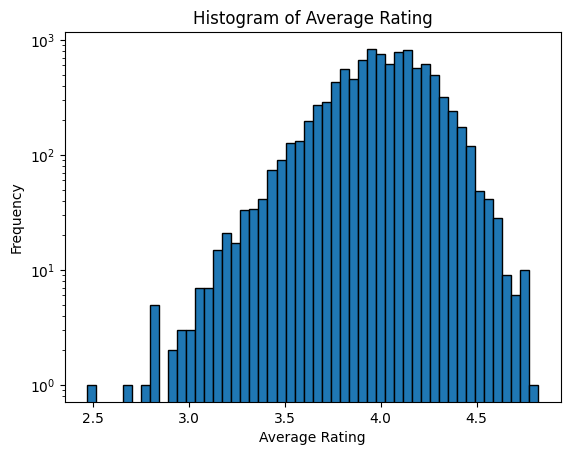

In [ ]:
books_df['average_rating'].plot.hist(bins=50, edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Average Rating')
plt.yscale('log')
plt.show()

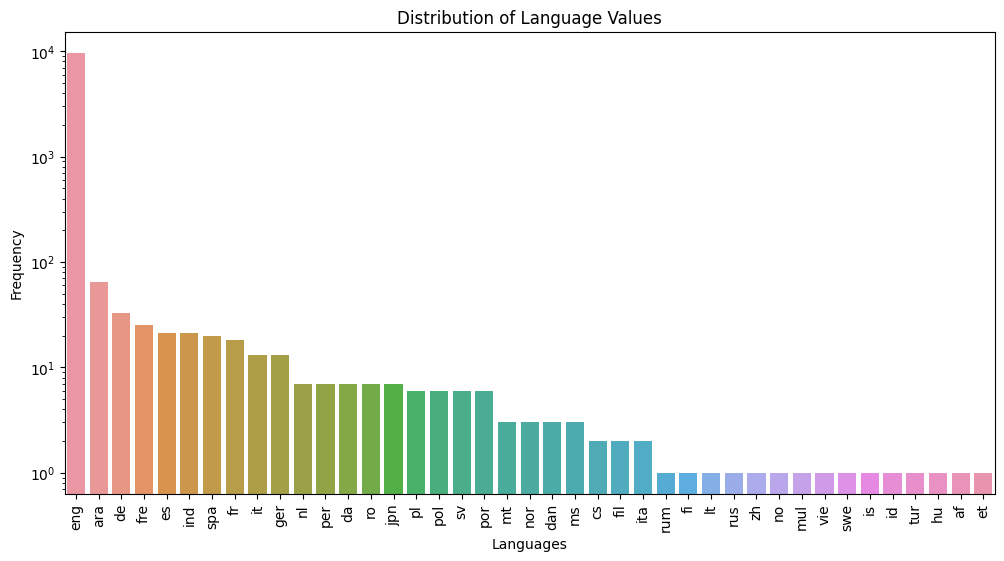

In [ ]:
language_counts = books_df['language'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=language_counts.index, y=language_counts.values)
plt.xlabel('Languages')
plt.ylabel('Frequency')
plt.title('Distribution of Language Values')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

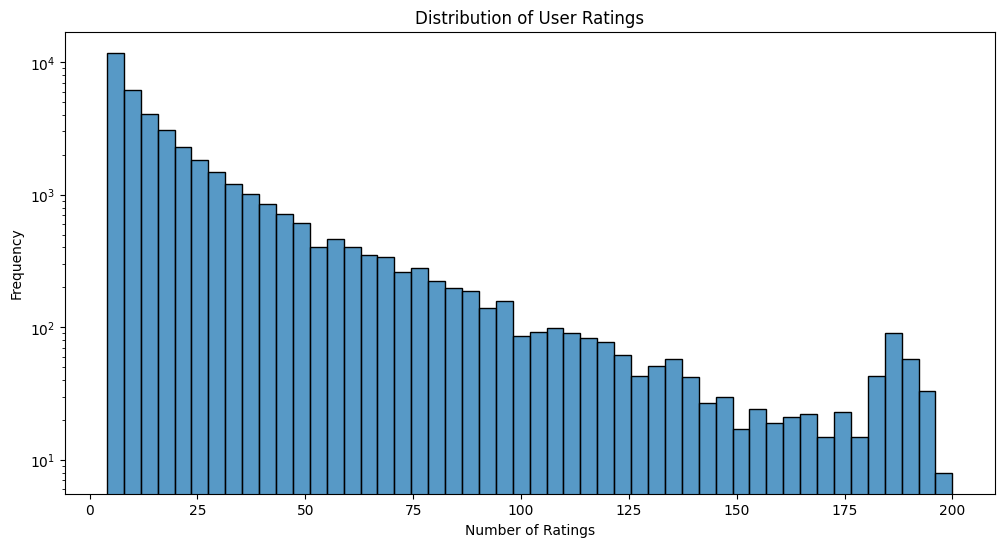

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=users_df, x='num_ratings', bins=50)
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of User Ratings')
plt.yscale('log')
plt.show()

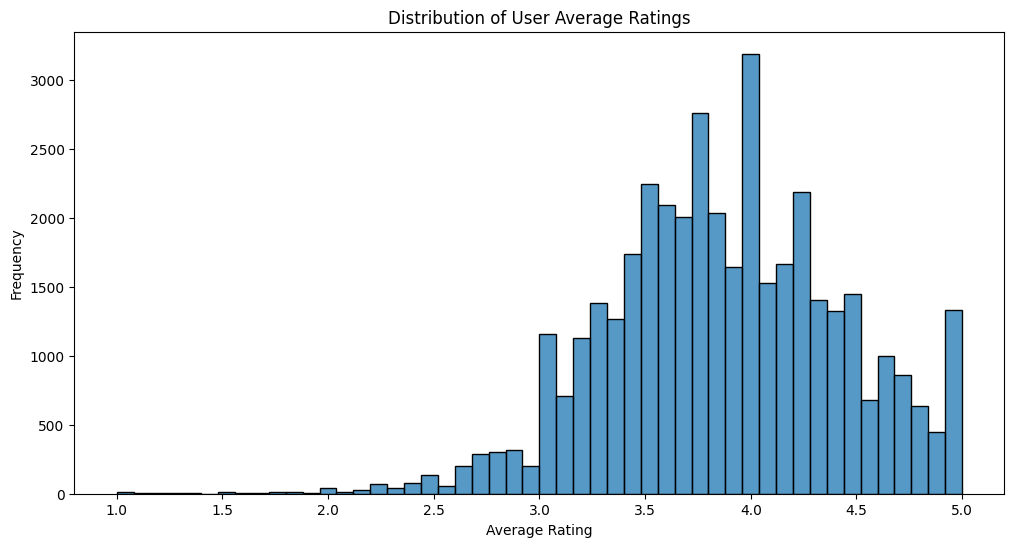

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=users_df, x='average_rating', bins=50)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of User Average Ratings')
plt.show()

In [ ]:
authors = get_authors(books_df)
from difflib import SequenceMatcher

def find_similar_authors(authors, threshold=0.8):
    similar_authors = []
    for i, author1 in enumerate(authors):
        for j, author2 in enumerate(authors):
            if i < j:
                similarity = SequenceMatcher(None, author1, author2).ratio()
                if similarity > threshold and similarity < 1:
                    similar_authors.append((author1, author2, similarity))

    return similar_authors

authors = get_authors(books_df)
similar_authors = find_similar_authors(authors, threshold=0.8)

In [ ]:
sorted_similar_authors = sorted(similar_authors, key=lambda x: x[2], reverse=True)

for author1, author2, similarity in sorted_similar_authors:
    print(f"{author1} - {author2}: {similarity}")


Robert           Jackson - Robert          Jackson: 0.9787234042553191
Patrick  Arrasmith - Patrick Arrasmith: 0.9714285714285714
Darick Robertson - Darick Robertston: 0.9696969696969697
Elizabeth  George - Elizabeth George: 0.9696969696969697
John   Williams - John  Williams: 0.9655172413793104
Shannon Watters - Shannon Waters: 0.9655172413793104
William  Gibson - William Gibson: 0.9655172413793104
Michael  Grant - Michael Grant: 0.9629629629629629
Eric Drydale - Eric Drysdale: 0.96
Steve Martin - Steve Martini: 0.96
Shoich Aoki - Shoichi Aoki: 0.9565217391304348
Kelly Jones - Kelley Jones: 0.9565217391304348
Alex Ross - Alex  Ross: 0.9473684210526315
William Nicholson - William   Nicholson: 0.9444444444444444
Stephen R. Covey - Stephen M.R. Covey: 0.9411764705882353
Gustaf Tenggren - Gustav Tenggren: 0.9333333333333333
Josh Hamilton - Joshua Hamilton: 0.9285714285714286
Steven Erikson - Steve Erickson: 0.9285714285714286
William Blake - William Baker: 0.9230769230769231
Richard Case 

In [ ]:
import re
def preprocess_author_name(author_name):
    author_name = author_name.strip()
    author_name = re.sub(r'\s+', ' ', author_name)
    return author_name

print(preprocess_author_name("Robert           Jackson"))
print(preprocess_author_name("Patrick  Arrasmith"))
print(preprocess_author_name("Elizabeth  George"))
print(preprocess_author_name("Christopher Godfrey Bond"))


Robert Jackson
Patrick Arrasmith
Elizabeth George
Christopher Godfrey Bond


In [ ]:
print(len(authors))

5841


In [ ]:
genres = get_genres(books_df)
print(len(genres))

41


In [ ]:
print(genres)

{'comics', 'classics', 'world war', 'poetry', 'fantasy', 'travel', 'romance', 'sports', 'art', 'self-help', 'young-adult', 'crime', 'christian', 'gay-and-lesbian', 'mystery', 'philosophy', 'humor-and-comedy', 'memoir', 'biography', 'religion', 'manga', 'horror', 'paranormal', 'books', '1914-1918', 'business', 'fiction', 'cookbooks', 'science', 'history', 'contemporary', 'chick-lit', 'historical-fiction', 'nonfiction', 'psychology', 'science-fiction', 'music', 'suspense', 'graphic-novels', 'spirituality', 'thriller'}


### GRAPHS

Bipartite Graph

In [9]:
G_bipartite = load_bipartite_graph(books_df, users_df, ratings_df)

In [15]:
users = [node for node in G_bipartite.nodes if node.startswith("u-")]
books = [node for node in G_bipartite.nodes if node.startswith("b-")]

avg_user_degree = sum(dict(G_bipartite.degree(users)).values()) / len(users)
avg_book_degree = sum(dict(G_bipartite.degree(books)).values()) / len(books)

print(avg_user_degree)
print(avg_book_degree)

23.853600766013205
94.6654


Number of nodes: 42008
Number of edges: 946476


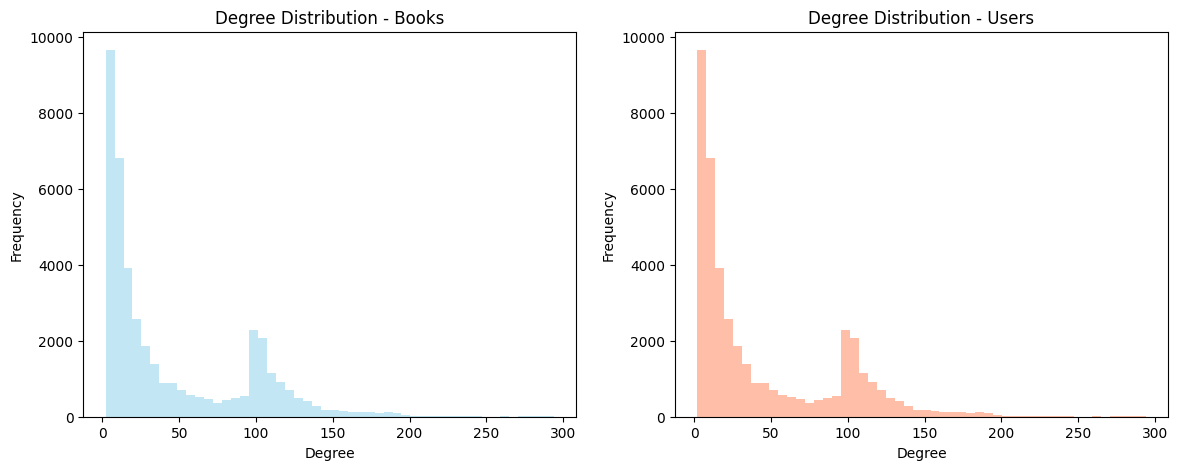

In [ ]:
print("Number of nodes:", G_bipartite.number_of_nodes())
print("Number of edges:", G_bipartite.number_of_edges())

book_degrees = [degree for node, degree in G_bipartite.degree()]
user_degrees = [degree for node, degree in G_bipartite.degree()]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(book_degrees, bins=50, alpha=0.5, color='skyblue')
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Degree Distribution - Books')

axes[1].hist(user_degrees, bins=50, alpha=0.5, color='coral')
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Degree Distribution - Users')
plt.show()

In [ ]:
largest_cc = max(nx.connected_components(G_bipartite), key=len)
print("Size of the largest connected component:", len(largest_cc))

Size of the largest connected component: 42008


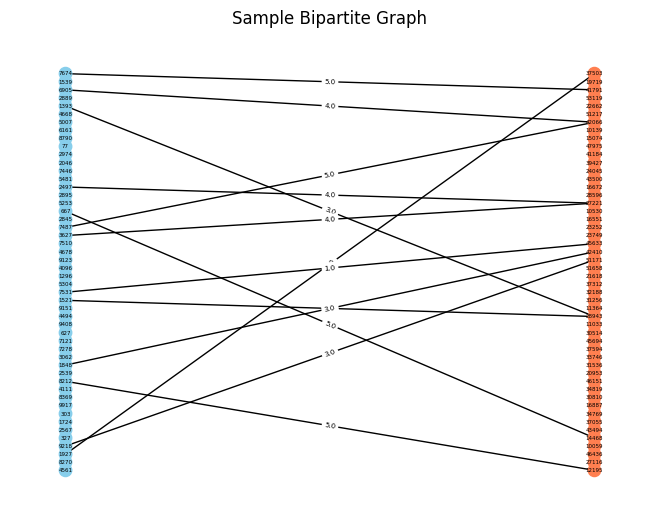

In [ ]:
import random

num_sample_books = 50
num_sample_users = 50

book_nodes = [node for node, attr in G_bipartite.nodes(data=True) if attr['type'] == 'b']
user_nodes = [node for node, attr in G_bipartite.nodes(data=True) if attr['type'] == 'u']

sample_book_nodes = random.sample(book_nodes, num_sample_books)
sample_user_nodes = random.sample(user_nodes, num_sample_users)
sample_nodes = sample_book_nodes + sample_user_nodes

G_sample = G_bipartite.subgraph(sample_nodes)

pos = nx.bipartite_layout(G_sample, nodes=sample_book_nodes)

nx.draw(G_sample, pos, with_labels=True, node_size=80, font_size=4, node_color=["skyblue" if node in sample_book_nodes else "coral" for node in G_sample.nodes])
edge_labels = {(u, v): d["weight"] for u, v, d in G_sample.edges(data=True)}
nx.draw_networkx_edge_labels(G_sample, pos, edge_labels=edge_labels, font_size=5)

plt.title("Sample Bipartite Graph")
plt.show()